# Lesson3-02. Reprojecting Data

## Overview

지도 투영법은 위도와 경도를 평평한 표면으로 체계적으로 변환하는 것이다. GIS 계층의 지도 투영은 상당히 자주 다르게 정의되기 때문에(즉, 일치하지 않음), 두 계층에서 지도 투영을 동일하게 재정의하는 것이 일반적인 절차이다. 도면층이 Point in Polygon 공간 쿼리를 수행하는 것과 같이 도면층 간의 공간 관계를 분석할 수 있도록 하는 것과 동일한 투영을 갖는 것이 중요하다.Geopandas에서는 투영을 정의하고 변경하는 것이 쉽다. 계속해서 주소 지점에서 작업하고, 좌표 참조 시스템(CRS)을 WGS84에서 핀란드에서 사용되고 Gauss-Krüger 투영법을 사용하는 ETRS GK-25(EPSG:3879)라는 투영법으로 변경할 것이다.

In [1]:
import geopandas as gpd

# .txt 파일 경로
fp = r"Dataset/Lesson3/addresses.shp"

# 데이터 읽기
data = gpd.read_file(fp)
data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

현재 "WGS84"를 이용하고 있다.

In [2]:
data["geometry"].head()

0    POINT (24.91477 60.16287)
1    POINT (24.93017 60.16837)
Name: geometry, dtype: geometry

"geometry"열을 확인하면 위도-경도의 값을 가진 것을 알 수 있다. 이를 ETRS GK-25 투영법으로 변환해 볼 것이다. .to_crs() 함수를 사용하여 쉽게 변환할 수 있는데, 함수에 대한 입력으로 geometry와 사용할 투영의 epgs값이 들어있는 열을 정의해야 한다.

In [4]:
data_proj = data.copy()
data_proj["geometry"] = data_proj["geometry"].to_crs(epsg=3879)

data_proj["geometry"].head()

0    POINT (25495267.432 6672221.349)
1    POINT (25496123.309 6672833.942)
Name: geometry, dtype: geometry

함수로 변환한 결과 POINT의 숫자가 변경된 것을 확인할 수 있다.
변경한 레이어를 이제 시각적으로 비교해볼 것이다.

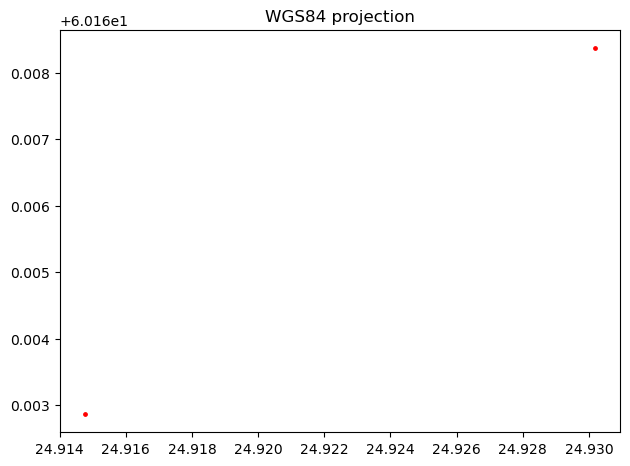

In [5]:
import matplotlib.pyplot as plt

# WGS84
data.plot(markersize=6, color="red")

plt.title("WGS84 projection")
plt.tight_layout()
plt.show()

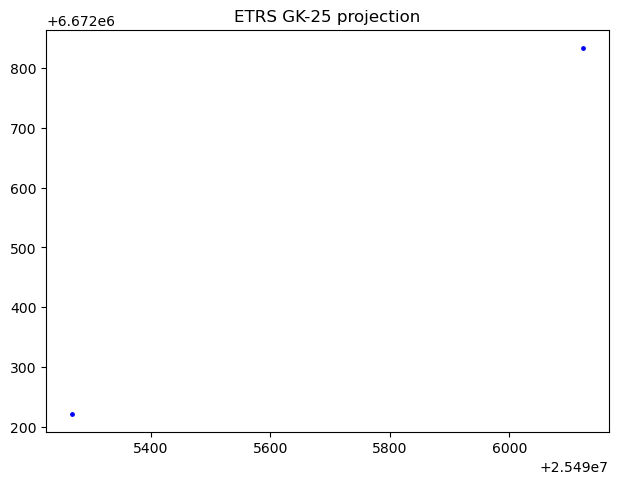

In [7]:
# ETRS GK-25
data_proj.plot(markersize=6, color="blue")

plt.title("ETRS GK-25 projection")
plt.tight_layout()
plt.show()

사실 이 course에서 더 많은 데이터를 이용하지만, 다운받을 수 없어서 2개의 점만 나타내었다. 실제 수업에서 나타낸 그래프는 아래와 같다.

- WGS84
![WGS84 projection](https://raw.githubusercontent.com/Automating-GIS-processes/2016/master/source/Lesson3-projections_files/Lesson3-projections_11_0.png)

- ETRS GK-25
![ETRS GK-25](raw.githubusercontent.com/Automating-GIS-processes/2016/master/source/Lesson3-projections_files/Lesson3-projections_11_1.png)


실제로, 이 두 그래프는 다르게 보이고 재투영된 "ETRS GK-25"의  그래프는 "WGS84"보다 훨씬 더 좋아 보인다.